In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import pickle

C:\Users\abhyu\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
from sklearn.model_selection import train_test_split
import os
import shutil

In [4]:
img_height, img_width = 224, 224  # Adjust based on image dimensions
batch_size = 32  # Tweak for your system

In [5]:

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1. / 255)  # Simpler for validation

train_data = train_datagen.flow_from_directory(
    'data/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # For multiple classes
)
test_data = test_datagen.flow_from_directory(
    'data/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4002 images belonging to 4 classes.
Found 845 images belonging to 4 classes.


In [7]:
base_model = ResNet50(
    weights='imagenet',  # Load pre-trained ImageNet weights 
    include_top=False,  # Exclude the original top layers
    input_shape=(img_height, img_width, 3)
)

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Optional intermediate dense layer
predictions = Dense(train_data.num_classes, activation='softmax')(x)  # Output layer
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
model.compile(optimizer=Adam(lr=0.002), loss='categorical_crossentropy', metrics=['accuracy']) 

In [10]:
epochs = 25  
history = model.fit(
    train_data, 
    epochs=epochs, 
    validation_data=test_data
)

Epoch 1/25



126/126 [==============================] - 658s 5s/step - loss: 0.9230 - accuracy: 0.6662 - val_loss: 1.6878 - val_accuracy: 0.2391
Epoch 2/25
126/126 [==============================] - 613s 5s/step - loss: 0.5853 - accuracy: 0.7809 - val_loss: 5.9898 - val_accuracy: 0.2462
Epoch 3/25
126/126 [==============================] - 673s 5s/step - loss: 0.5653 - accuracy: 0.7826 - val_loss: 2.5294 - val_accuracy: 0.2462
Epoch 4/25
126/126 [==============================] - 615s 5s/step - loss: 0.4852 - accuracy: 0.8168 - val_loss: 2.1457 - val_accuracy: 0.2107
Epoch 5/25
126/126 [==============================] - 598s 5s/step - loss: 0.4381 - accuracy: 0.8376 - val_loss: 4.4347 - val_accuracy: 0.2473
Epoch 6/25
126/126 [==============================] - 601s 5s/step - loss: 0.4440 - accuracy: 0.8353 - val_loss: 4.6510 - val_accuracy: 0.2462
Epoch 7/25
126/126 [==============================] - 599s 5s/step - loss: 0.4086 - accuracy: 0.8411 - val_loss: 0.8757 - val_accuracy: 0.6710
Epoch 8/25

In [11]:
loss, accuracy = model.evaluate(test_data)
print("Test accuracy:", accuracy)

27/27 [==============================] - 51s 2s/step - loss: 0.8115 - accuracy: 0.7385
Test accuracy: 0.7384615540504456


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array




image_path = 'dataset\glaucoma\_2_5194189.jpg' 

# Preprocess the image
img = load_img(image_path, target_size=(img_height, img_width))  
img_array = img_to_array(img)
img_array = img_array / 255.0  
img_batch = np.expand_dims(img_array, axis=0)  

# Predict 
prediction = model.predict(img_batch)
class_folders = ['cataract' , 'diabetic_retinopathy','glaucoma' , 'normal']

predicted_class = class_folders[np.argmax(prediction[0])] 

print(f"Image Path: {image_path}")
print(f"Predicted Class: {predicted_class}") 

1/1 [==============================] - 4s 4s/step
Image Path: dataset\glaucoma\_2_5194189.jpg
Predicted Class: glaucoma


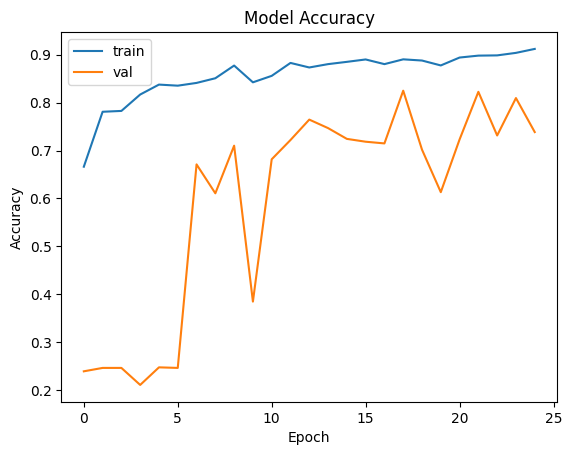

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion matrix, without normalization
Normalized confusion matrix


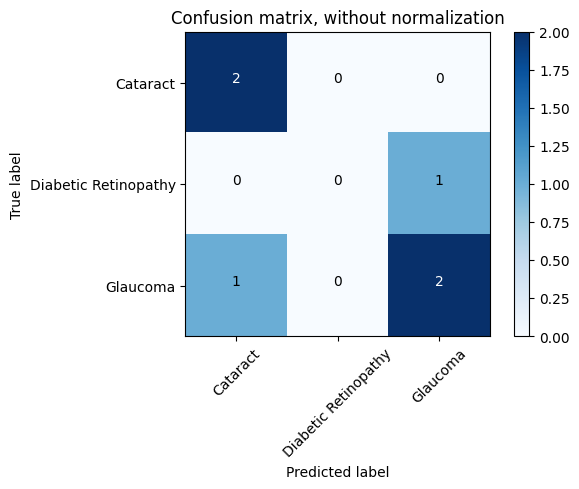

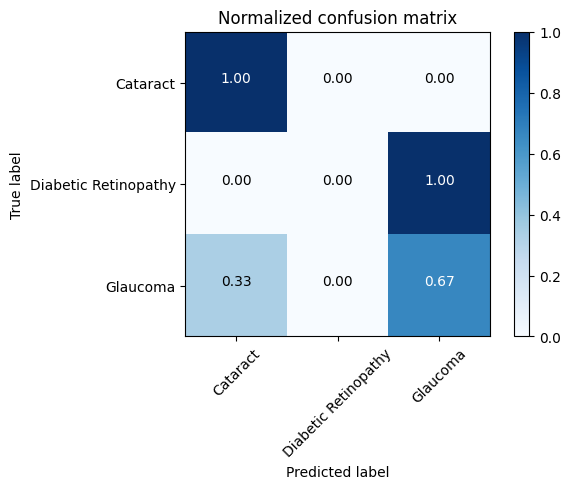

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example usage:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
# Replace y_true and y_pred with your actual data
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
classes = ['Cataract', 'Diabetic Retinopathy', 'Glaucoma']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
